In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

We need to generate the data to use input/labels for the neural network.
Let's start with that.

We have x as input (size 1) and y as output (size 1).

In [209]:
X_train = np.array(range(-5000, 5000))
y_train = np.array([(x**3) + (2*(x**2)) - 5 for x in X_train])

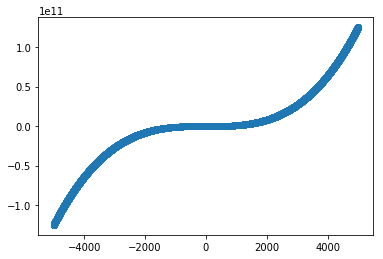

In [228]:
plt.scatter(X_train, y_train)
plt.show()

Start by creating the sequential model in keras

In [250]:
model = Sequential()

Now, we add the layers to the model

In [251]:
model.add(Dense(5, input_shape=(1,)))
model.add(Dense(100, activation='relu')) # Play with values: i.e. 1, 10, 100. Try also adding new layers.
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

The model needs to be "compiled" before being trained

In [252]:
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[soft_acc])

Now we can train it and monitor it's progress.

In [253]:
x_scaler = MinMaxScaler(feature_range=(-1,1))
y_scaler = MinMaxScaler(feature_range=(-1,1))
x_scaler.fit(X_train.reshape(-1,1))
X_train_norm = x_scaler.transform(X_train.reshape(-1,1))
y_scaler.fit(y_train.reshape(-1,1))
y_train_norm = y_scaler.transform(y_train.reshape(-1,1))
history = model.fit(X_train_norm, y_train_norm, epochs=20)

/Users/cristian/.envs/jupyter/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/20
10000/10000 [==============================] - 2s 173us/step - loss: 0.0069 - soft_acc: 0.9703
Epoch 2/20
10000/10000 [==============================] - 1s 59us/step - loss: 5.5542e-05 - soft_acc: 0.9957
Epoch 3/20
10000/10000 [==============================] - 1s 60us/step - loss: 2.3593e-05 - soft_acc: 0.9980
Epoch 4/20
10000/10000 [==============================] - 1s 61us/step - loss: 6.8125e-05 - soft_acc: 0.9973
Epoch 5/20
10000/10000 [==============================] - 1s 60us/step - loss: 7.7549e-05 - soft_acc: 0.9968
Epoch 6/20
10000/10000 [==============================] - 1s 60us/step - loss: 7.0319e-05 - soft_acc: 0.9974
Epoch 7/20
10000/10000 [==============================] - 1s 61us/step - loss: 4.2203e-05 - soft_acc: 0.9979
Epoch 8/20
10000/10000 [==============================] - 1s 61us/step - loss: 9.9413e-06 - soft_acc: 0.9985
Epoch 9/20
10000/10000 [==============================] - 1s 59us/step - loss: 3.0175e-05 - soft_acc: 0.9974
Epoch 10/20
10000/1000

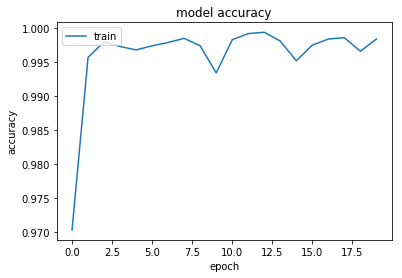

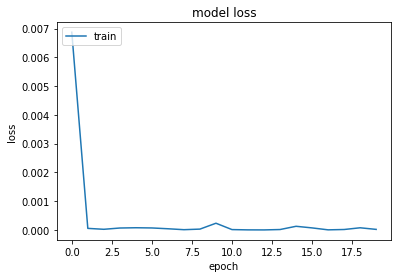

In [254]:
plt.plot(history.history['soft_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

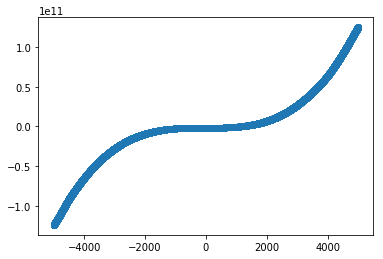

In [263]:
y_predicted = model.predict(x_scaler.transform(X_train.reshape(-1,1)))
plt.scatter(X_train, y_scaler.inverse_transform(y_predicted))
plt.show()

In [278]:
y_expected = (0**3) + (2*(0**2)) - 5
x_transform = x_scaler.transform(0)
prediction = model.predict(x_transform)
y = y_scaler.inverse_transform(prediction)
print('x_transform: {}, prediction_transform: {}, prediction: {}, expected: {}'
      .format(x_transform, prediction, y, y_expected))
print('error: {}'.format(abs(y-y_expected)))

x_transform: [[0.00010001]], prediction_transform: [[-0.01152071]], prediction: [[-1.4271592e+09]], expected: -5
error: [[1.4271592e+09]]


In [280]:
y_expected = (5000**3) + (2*(5000**2)) - 5
x_transform = x_scaler.transform(5000)
prediction = model.predict(x_transform)
y = y_scaler.inverse_transform(prediction)
print('x_transform: {}, prediction_transform: {}, prediction: {}, expected: {}'
      .format(x_transform, prediction, y, y_expected))
print('error: {}'.format(abs(y-y_expected)))

x_transform: [[1.00020002]], prediction_transform: [[1.0014141]], prediction: [[1.251517e+11]], expected: 125049999995
error: [[1.01698949e+08]]
